Run these first two cells to import all required packages and initialize all required functions

In [5]:
import numpy as np
from matplotlib import pyplot as plt

In [6]:
def sample_seg(min_seg_len, max_seg_len, min_slope, max_slope):
    seg_len = np.random.uniform(min_seg_len, max_seg_len)
    seg_slope = np.random.uniform(min_slope, max_slope)
    return seg_len, seg_slope

def ground(initx = 0, inity = 0.1, maxx = 1.25, miny = 0.0, maxy = 0.5, min_seg_len = 0.02, max_seg_len = 0.07, min_slope = -0.5, max_slope = 0.5, savepath = None):
    begx = [-100]
    begy = [inity]
    lens = [100 + initx]
    slopes = [0]
    shifts = [inity]
    x = initx
    y = inity

    while x < maxx:
        begx.append(x)
        begy.append(y)
        seg_len, seg_slope = sample_seg(min_seg_len, max_seg_len, min_slope, max_slope)
        seg_slope = seg_slope + 0.2
        tmp_y = y + seg_slope * seg_len
        while tmp_y < miny or tmp_y > maxy:
            seg_len, seg_slope = sample_seg(min_seg_len, max_seg_len, min_slope, max_slope)
            tmp_y = y + seg_slope * seg_len
        lens.append(seg_len)
        slopes.append(seg_slope)
        b = y - seg_slope * x
        shifts.append(b)
        y = y + seg_slope * seg_len
        x += seg_len
    
    begx.append(x)
    begy.append(y)
    lens.append(100)
    slopes.append(0)
    shifts.append(y)
    begx = np.array(begx)
    begy = np.array(begy)
    lens = np.array(lens)
    slopes = np.array(slopes)
    shifts = np.array(shifts)
    if savepath is not None:
        np.save(savepath, [begx, begy, lens, slopes, shifts])
    return begx, begy, lens, slopes, shifts

Run this third cell as many times as you'd like to generate a new ground file

28


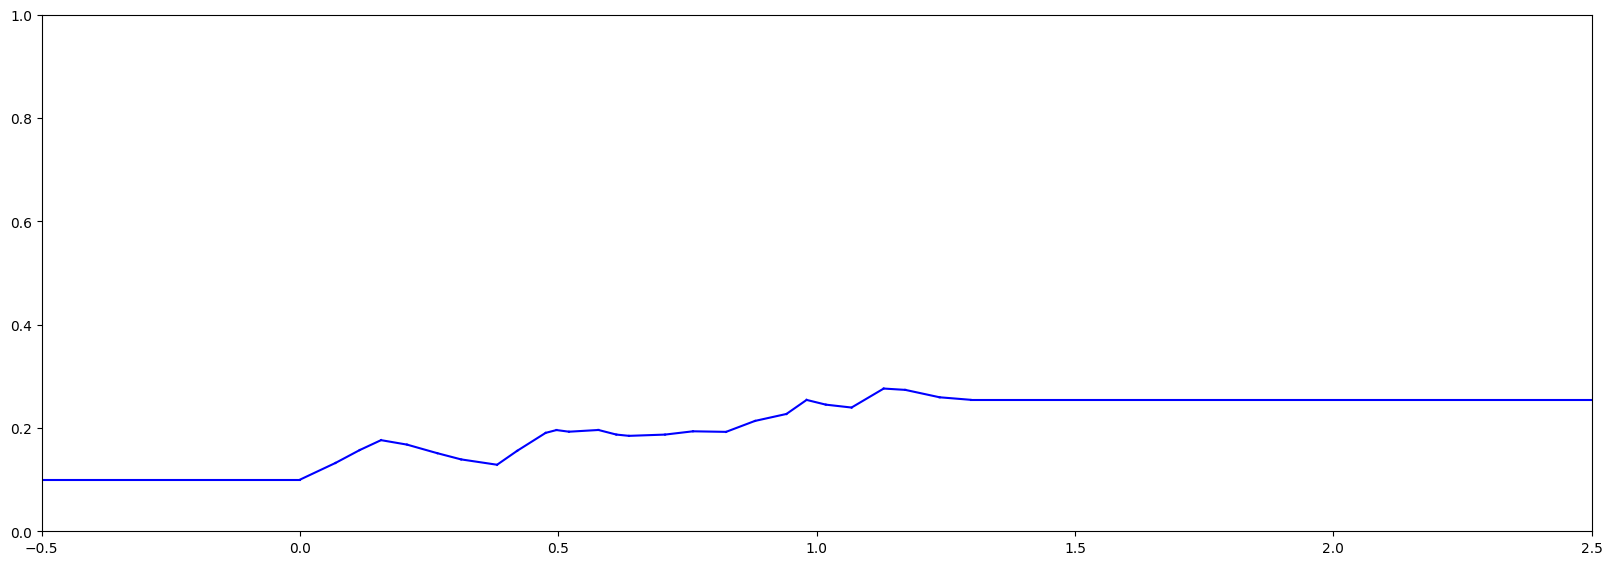

In [7]:
xs, ys, lens, slopes, shifts = ground()
n = len(xs)
print(n)

fig = plt.figure(figsize=(20, 10))

for i in range(n):
    plt.plot([xs[i], xs[i] + lens[i]], [ys[i], ys[i] + lens[i] * slopes[i]], 'b')

plt.xlim(-0.5, 2.5)
plt.ylim(0, 1)
plt.gca().set_aspect('equal', adjustable='box')

Run this fourth cell to save the terrain displayed above^

In [4]:
np.save("./terrain.npy", [xs, ys, lens, slopes, shifts])